___

<a href='http://github.com/karthickai'> <img src='Karthick_Ai.png' /></a>
___
# Linear Regression 

Amazon_cloths sells cloths online. Customers come in to the store, have meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 
Following is predict is analysis for this company

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [26]:
customers = pd.read_csv('ecommerce customers.csv')

In [27]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,835 Frank Tunnel,NaN,NaN,NaN,NaN,NaN,NaN
1,Wrightmouth,"MI 82180-9605""",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
2,hduke@hotmail.com,4547 Archer Common,NaN,NaN,NaN,NaN,NaN,NaN
3,Diazchester,"CA 06566-8576""",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
4,pallen@yahoo.com,24645 Valerie Unions Suite 582,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,454.000000
mean,31.130462,14.350284,33.956926,48.607305,499.919858
std,6.128380,7.327838,9.787361,144.216919,78.325793
min,8.668350,8.508152,0.789520,0.269901,266.086341
25%,32.086022,11.469670,36.088966,3.014640,445.917049
50%,32.904773,12.109744,36.943004,3.653135,498.887875
75%,33.636921,12.992473,37.648456,4.534414,549.100737
max,36.139662,39.220713,40.005182,744.221867,765.518462


In [29]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 1000 non-null   object 
 1   Address               1000 non-null   object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   454 non-null    float64
dtypes: float64(5), object(3)
memory usage: 62.6+ KB


In [31]:
customers.replace([np.inf, -np.inf], np.nan, inplace=True)

In [32]:
customers.fillna(999, inplace=True)

## Data Analysis

In [33]:
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

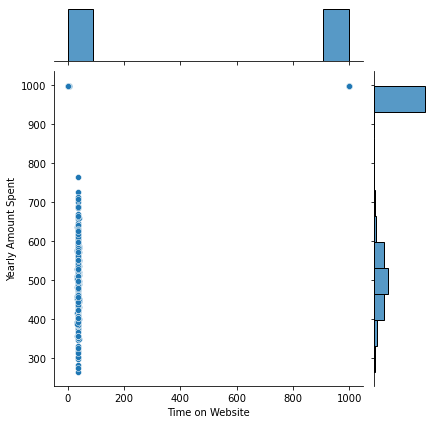

In [34]:
sns.jointplot(customers['Time on Website' ],customers['Yearly Amount Spent'])

** Do the same but with the Time on App column instead. **

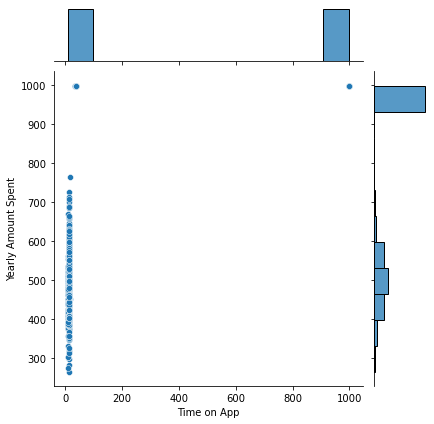

In [35]:
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

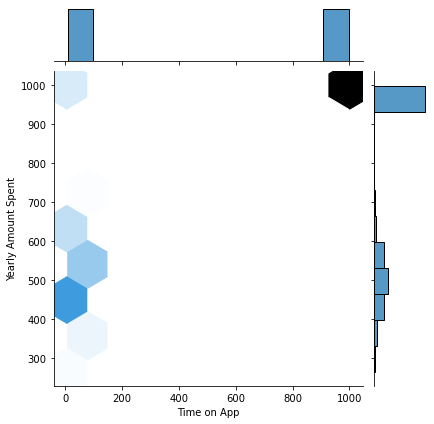

In [36]:
sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'],kind='hex')

**Let's explore these types of relationships across the entire data set **

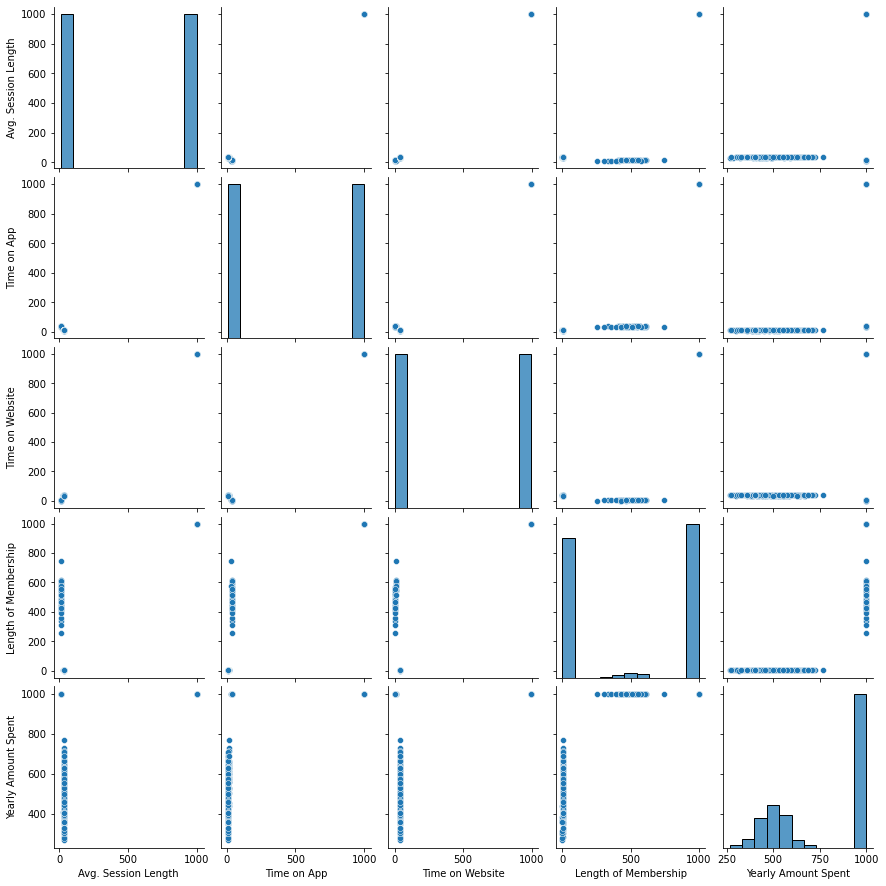

In [37]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [38]:
#Length of Membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

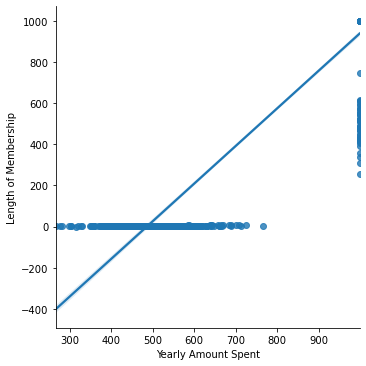

In [39]:
sns.lmplot(x='Yearly Amount Spent',y ='Length of Membership', data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [40]:
y = customers['Yearly Amount Spent']

In [41]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [44]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [45]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [46]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [47]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [  7.44129441   6.65267998 -13.83106542   0.05157154]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [48]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

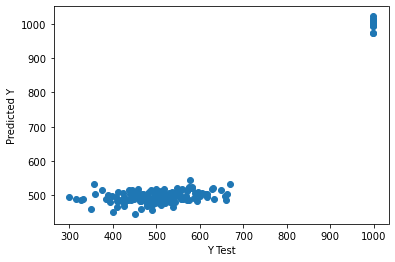

In [49]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. **

In [50]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 26.692231279079035
MSE: 2439.933337971319
RMSE: 49.39568136964323


## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

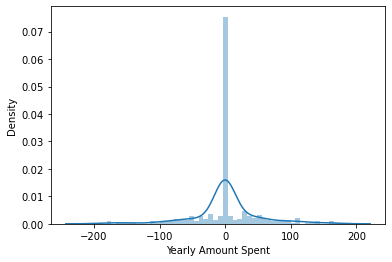

In [51]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [52]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,7.441294
Time on App,6.652680
Time on Website,-13.831065
Length of Membership,0.051572


**Do you think the company should focus more on their mobile app or on their website?**


*Mobile App*